In this exercise, we will use Tensorflow for classification.

To begin, install tensorflow on your machine. __[One way](https://www.youtube.com/watch?v=gDzAm25CORk)__ to do so is using Anaconda. Another is to install pip, and then type in the command line 'pip install tensorflow'.



## Hello world

We will now execute a simple command that creates a __[constant](https://www.tensorflow.org/api_docs/python/tf/constant)__ tensor. We also create a __[session](https://www.tensorflow.org/api_docs/python/tf/Session)__ for running the tensorflow operations.

In [1]:
import tensorflow as tf

hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))

b'Hello, TensorFlow!'


## Basic Operations

We now execute some basic operations using the tensorflow library.

In a basic **constant operation**, the value returned by the constructor represents the output of the Constant op.

In [2]:
a = tf.constant(2)
b = tf.constant(3)

Let us launch the default graph.

In [3]:
with tf.Session() as sess:
    print("a: %i" % sess.run(a), "b: %i" % sess.run(b))
    print("Addition with constants: %i" % sess.run(a+b))
    print("Multiplication with constants: %i" % sess.run(a*b))

a: 2 b: 3
Addition with constants: 5
Multiplication with constants: 6


In basic Operations with **variable** graph input, the value returned by the constructor represents the output
of the Variable op (define as input when running session). This is done so using a __[placeholder](https://www.tensorflow.org/api_docs/python/tf/placeholder)__.

In [4]:
# Inserts a placeholder for a tensor that will be always fed
a = tf.placeholder(tf.int16)
b = tf.placeholder(tf.int16)

We can define the __[addition](https://www.tensorflow.org/api_docs/python/tf/add)__ and __[multiplication](https://www.tensorflow.org/api_docs/python/tf/multiply)__ operations as follows.

In [5]:
add = tf.add(a, b)
mul = tf.multiply(a, b)

Let us launch the default graph.

In [6]:
with tf.Session() as sess:
    # Run every operation with variable input
    print("Addition with variables: %i" % sess.run(add, feed_dict={a: 2, b: 3}))
    print("Multiplication with variables: %i" % sess.run(mul, feed_dict={a: 2, b: 3}))

Addition with variables: 5
Multiplication with variables: 6


Let us now look at **matrix multiplication**. 

Create a Constant op that produces a 1x2 matrix.  The op is added as a node to the default graph.

In [7]:
matrix1 = tf.constant([[3., 3.]]) # 1 row, 2 columns

Create another Constant that produces a 2x1 matrix.

In [8]:
matrix2 = tf.constant([[2.],[2.]]) # 2 rows, 1 column

Create a __[Matmul](https://www.tensorflow.org/api_docs/python/tf/matmul)__ op that takes 'matrix1' and 'matrix2' as inputs. The returned value, 'product', represents the result of the matrix multiplication.

In [9]:
# Multiplies matrix a by matrix b, producing a * b
product = tf.matmul(matrix1, matrix2)

To run the matmul op we **call the session 'run()' method**, passing 'product' which represents the output of the matmul op.  This indicates to the call that we want to get the output of the matmul op back. All inputs needed by the op are run automatically by the session.  They typically are run in parallel. The call 'run(product)' thus causes the execution of threes ops in the graph: the two constants(**matrix1 and matrix2 are executing constant() method**) and matmul. The output of the op is returned in 'result' as a numpy `ndarray` object.

In [10]:
with tf.Session() as sess:
    result = sess.run(product)
    print(result)

[[ 12.]]


## Linear Regression

Let us now perform linear regression using tensorflow.

In [11]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

Define the parameters. 
'learning_rate' sets the rate of convergence of the gradient descent optimizer.
'training_epochs' sets the number of iterations, where an 'epoch' is an iteration.
'display_step' sets the frequency of epochs to print the current status of the algorithm.

In [27]:
learning_rate = 0.01 # rate of convergence of GD
training_epochs = 1000 # the number of iterations
display_step = 50

The training data is given as below.

In [13]:
train_X = numpy.asarray([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
                         7.042,10.791,5.313,7.997,5.654,9.27,3.1])
train_Y = numpy.asarray([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
                         2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = train_X.shape[0]

In [14]:
n_samples

17

The input graph is created and weights for the model are set.

In [15]:
X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

The linear model is constructed.

**tf.multiply: Returns x * y element-wise.**

In [16]:
pred = tf.add(tf.multiply(X, W), b)

The mean squared error and the optimizer are defined.

**tf.reduce_sum: Computes the sum of elements across dimensions of a tensor.**

In [17]:
cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)
 
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Initialize the variables (i.e. assign their default value).

In [18]:
init = tf.global_variables_initializer()

Start training.

Epoch: 0050 cost= 0.149709582 W= 0.402708 b= 0.000776693
Epoch: 0100 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0150 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0200 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0250 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0300 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0350 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0400 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0450 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0500 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0550 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0600 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0650 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0700 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0750 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0800 cost= 0.149707392 W= 0.402707 b= 0.000776429
Epoch: 0850 cost= 0.149706200 W= 0.402706 b= 0.000776191
Epoch: 0900 cost= 0.149707392 W

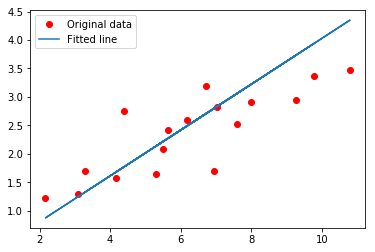

In [28]:
with tf.Session() as sess:
    sess.run(init)

    # Fit all training data
    for epoch in range(training_epochs):
        for (x, y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X: x, Y: y})

        #Display logs per epoch step
        if (epoch+1) % display_step == 0:
            c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                "W=", sess.run(W), "b=", sess.run(b))

    print("Optimization Finished.")
    training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')

    #Graphic display
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()

### Q1. Observe the dependence of the training cost (error) on the learning rate.

With all other parameters fixed, we now vary the learning rate to take three values in $\{0.0001,0.01,0.8\}$. Draw a plot with y-axis representing the training cost and the x-axis representing the iteration (0 through 1000). There must be three curves in this plot, each representing a choice of learning rate.

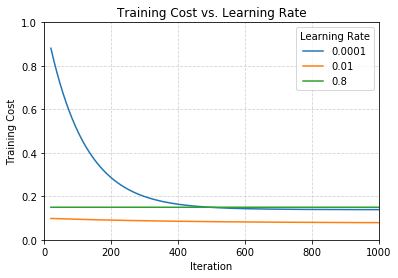

In [29]:
#----------------- Your code here ---------------#
learning_rates = [0.0001, 0.01, 0.8]

for learning_rate in learning_rates:
    costs = []
    W = tf.Variable(rng.randn(), name = "weight")
    b = tf.Variable(rng.randn(), name = "bias")
    pred = tf.add(tf.multiply(X, W), b)
    cost = tf.reduce_sum(tf.pow(pred - Y, 2))/(2 * n_samples)
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    init = tf.global_variables_initializer()

    with tf.Session() as sess:
        sess.run(init)

        # Fit all training data
        for epoch in range(training_epochs):
            for (x, y) in zip(train_X, train_Y):
                sess.run(optimizer, feed_dict = {X: x, Y: y})
                
            # Store costs per epoch step
            c = sess.run(cost, feed_dict = {X: train_X, Y: train_Y})
            costs.append(c)
            
    plt.plot(range(20, training_epochs), costs[20:], label = str(learning_rate))
      
plt.xlabel('Iteration')
plt.ylabel('Training Cost')
plt.xlim(0, 1000)
plt.ylim(0, 1)
plt.title('Training Cost vs. Learning Rate')
plt.legend(loc = "upper right", title = "Learning Rate")
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()

#------------------------------------------------#

As we can observe, very small or very large learning rates aren't preferable since even convergence is not guaranteed.

## Logistics Regression
Let us now perform logistics regression using tensorflow. We will now be using the __[MNIST database of handwritten digits](http://yann.lecun.com/exdb/mnist/)__.

The data can be imported 

In [21]:
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np

# Import MINST data
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


Let us see visualize a part of the data.

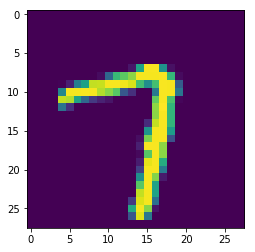

True classification: 7


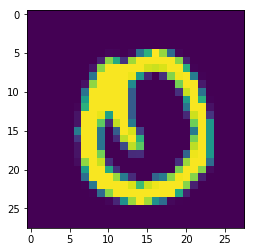

True classification: 0


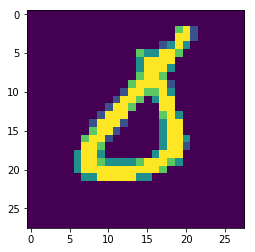

True classification: 0


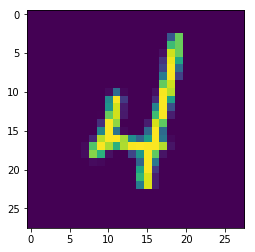

True classification: 4


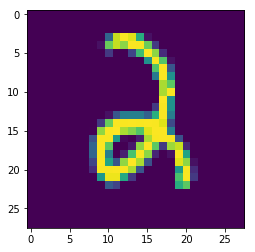

True classification: 2


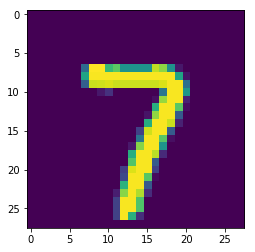

True classification: 7


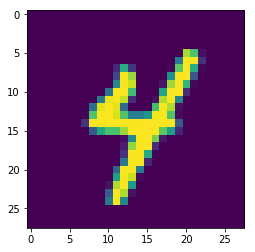

True classification: 4


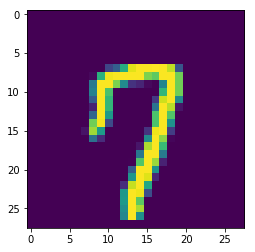

True classification: 7


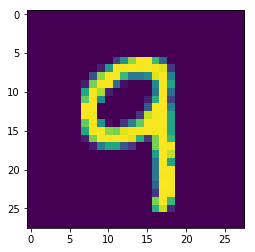

True classification: 9


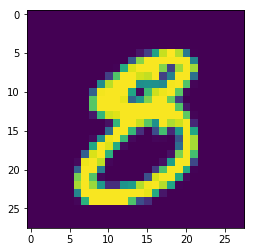

True classification: 8


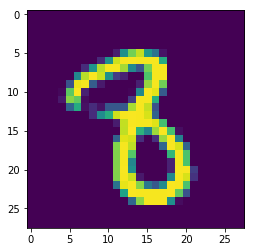

True classification: 8


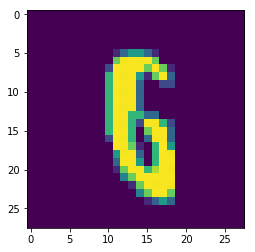

True classification: 6


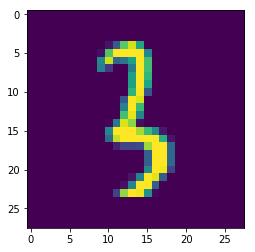

True classification: 3


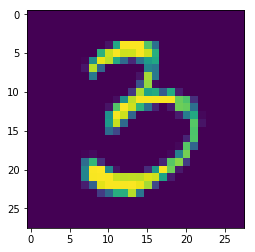

True classification: 3


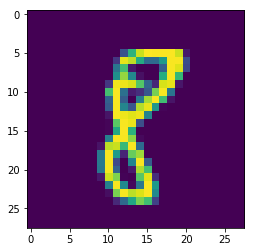

True classification: 8


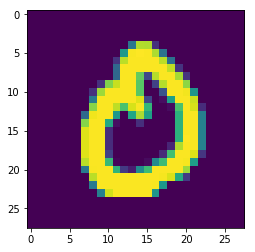

True classification: 0


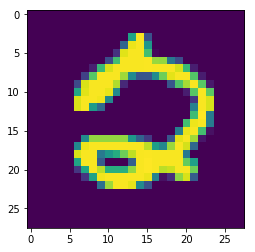

True classification: 2


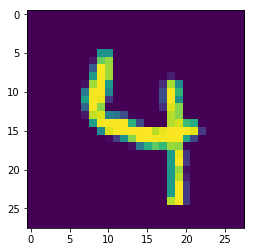

True classification: 4


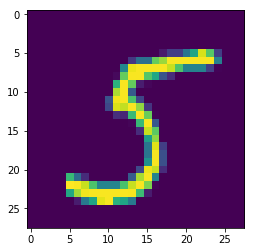

True classification: 5


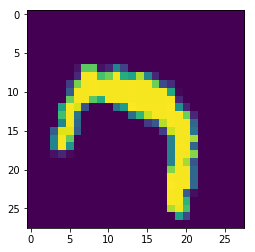

True classification: 7


In [22]:
def gen_image(arr):
    two_d = (np.reshape(arr, (28, 28)) * 255).astype(np.uint8)
    plt.imshow(two_d, interpolation='nearest')
    return plt

# Get a batch of two random images and show in a pop-up window.
batch_xs, batch_ys = mnist.test.next_batch(20)
for i in range(20):
    gen_image(batch_xs[i]).show()
    print("True classification:",list(batch_ys[i]).index(1))

Then, we set the parameters similar to the linear regression exercise.

In [23]:
# Parameters
learning_rate = 0.01
training_epochs = 100
batch_size = 100
display_step = 1

# tf Graph Input
x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes

# Set model weights
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

# Construct model
pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax

# Minimize error using cross entropy
cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices=1))

# Gradient Descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

Start training.

Epoch: 0001 cost= 1.183504469
Epoch: 0002 cost= 0.665233125
Epoch: 0003 cost= 0.552797505
Epoch: 0004 cost= 0.498667916
Epoch: 0005 cost= 0.465452726
Epoch: 0006 cost= 0.442589262
Epoch: 0007 cost= 0.425501532
Epoch: 0008 cost= 0.412180263
Epoch: 0009 cost= 0.401411550
Epoch: 0010 cost= 0.392450988
Epoch: 0011 cost= 0.384788335
Epoch: 0012 cost= 0.378133222
Epoch: 0013 cost= 0.372414780
Epoch: 0014 cost= 0.367299522
Epoch: 0015 cost= 0.362703505
Epoch: 0016 cost= 0.358586483
Epoch: 0017 cost= 0.354861129
Epoch: 0018 cost= 0.351422077
Epoch: 0019 cost= 0.348355285
Epoch: 0020 cost= 0.345485780
Epoch: 0021 cost= 0.342682655
Epoch: 0022 cost= 0.340249519
Epoch: 0023 cost= 0.337953644
Epoch: 0024 cost= 0.335713265
Epoch: 0025 cost= 0.333703836
Epoch: 0026 cost= 0.331770384
Epoch: 0027 cost= 0.329915960
Epoch: 0028 cost= 0.328232877
Epoch: 0029 cost= 0.326583559
Epoch: 0030 cost= 0.325067132
Epoch: 0031 cost= 0.323558554
Epoch: 0032 cost= 0.322133821
Epoch: 0033 cost= 0.320861562
Epoch: 003

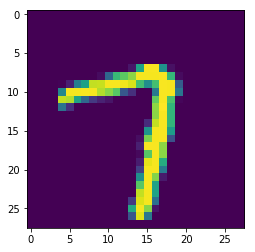

Predicted classification: 7


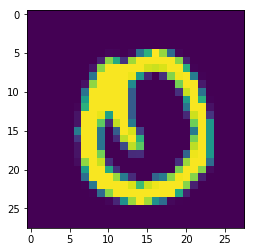

Predicted classification: 0


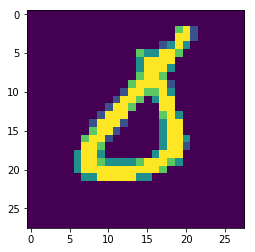

Predicted classification: 0


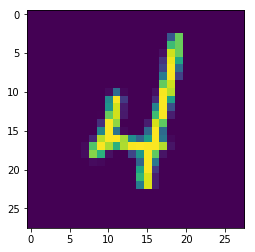

Predicted classification: 4


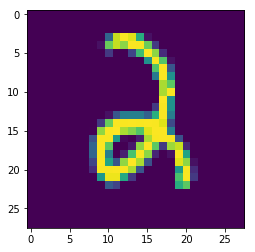

Predicted classification: 2


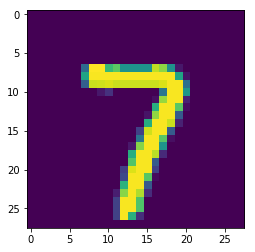

Predicted classification: 7


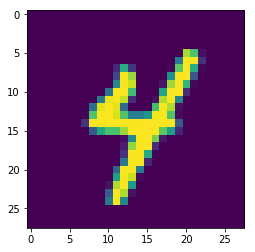

Predicted classification: 4


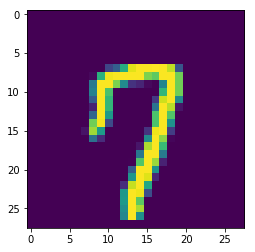

Predicted classification: 7


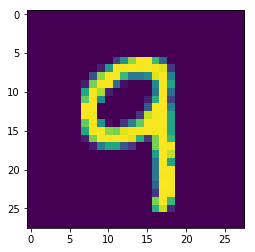

Predicted classification: 9


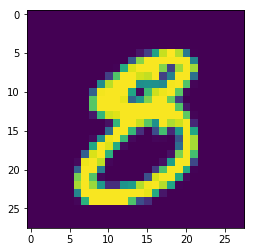

Predicted classification: 8


In [24]:
with tf.Session() as sess:
    sess.run(init)

    # Training cycle
    for epoch in range(training_epochs):
        avg_cost = 0.
        total_batch = int(mnist.train.num_examples / batch_size)
        
        # Loop over all batches
        for i in range(total_batch):
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            # Fit training using batch data
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,
                                                          y: batch_ys})
            # Compute average loss
            avg_cost += c / total_batch
            
        # Display logs per epoch step
        if (epoch + 1) % display_step == 0:
            print("Epoch:", '%04d' % (epoch + 1), "cost=", "{:.9f}".format(avg_cost))
            
    prediction=tf.argmax(pred,1)
    print("Optimization Finished.")

    # Test model
    correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
    
    # Calculate accuracy for 3000 examples
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    print("Accuracy:", accuracy.eval({x: mnist.test.images[:3000], y: mnist.test.labels[:3000]}))
    
    predicted_labels = list(prediction.eval({x: mnist.test.images[:3000]}))
    images = mnist.test.images[:3000]
    for i in range(10):
        gen_image(images[i]).show()
        print("Predicted classification:",predicted_labels[i])   

### Q2. Observe the dependence of the training cost (error) on the learning rate.

With all other parameters fixed, we now vary the learning rate to take three values in $\{0.0001,0.01,1\}$. Draw a plot with y-axis representing the training cost and the x-axis representing the iteration (0 through 1000). There must be three curves in this plot, each representing a choice of learning rate.

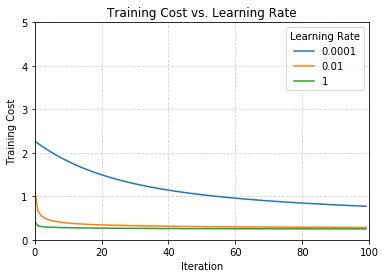

In [25]:
#----------------- Your code here ---------------#
learning_rates = [0.0001, 0.01, 1]

for learning_rate in learning_rates:
    costs = []
    x = tf.placeholder(tf.float32, [None, 784]) # mnist data image of shape 28*28=784
    y = tf.placeholder(tf.float32, [None, 10]) # 0-9 digits recognition => 10 classes
    W = tf.Variable(tf.zeros([784, 10]))
    b = tf.Variable(tf.zeros([10]))
    
    # Construct model
    pred = tf.nn.softmax(tf.matmul(x, W) + b) # Softmax
    
    # Minimize error using cross entropy
    cost = tf.reduce_mean(-tf.reduce_sum(y*tf.log(pred), reduction_indices = 1))
    
    # Gradient Descent
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    
    # Initialize the variables (i.e. assign their default value)
    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        for epoch in range(training_epochs):
            avg_cost = 0.
            total_batch = int(mnist.train.num_examples/batch_size)
            
            # Loop over all batches
            for i in range(total_batch):
                batch_xs, batch_ys = mnist.train.next_batch(batch_size)
                
                # Fit training using batch data
                _, c = sess.run([optimizer, cost], feed_dict={x: batch_xs,y: batch_ys})
                
                # Compute average loss
                avg_cost += c / total_batch
            costs.append(avg_cost)
            
    plt.plot(range(training_epochs), costs, label = str(learning_rate))
    
plt.xlabel('Iteration')
plt.ylabel('Training Cost')
plt.xlim(0, 100)
plt.ylim(0, 5)
plt.title('Training Cost vs. Learning Rate')
plt.legend(loc = "upper right", title = "Learning Rate")
plt.grid(color = 'lightgray', linestyle = '--')
plt.show()

#------------------------------------------------#